# Parse PATH monthly ridership PDF
```bash
papermill -p year $year [-p last_month $last_month] monthly.ipynb out/monthly-$year.ipynb
```

In [1]:
from utz import *
import json
from tabula import read_pdf
from path_data import paths
from path_data.paths import monthly_pdf, year_pqt, year_day_types_pqt, TEMPLATE_2023, TEMPLATE_2022

In [2]:
n = now()
cur_year = n.year
cur_month = n.month
cur_year, cur_month

(2026, 2)

Papermill parameters:

In [3]:
year = None
last_month = None
template = None

In [4]:
# Parameters
year = 2025


In [5]:
if year is None:
    year = cur_year

pdf = monthly_pdf(year)
relpath(pdf)

'data/2025-PATH-Monthly-Ridership-Report.pdf'

In [6]:
if last_month is None:
    from PyPDF2 import PdfReader

    reader = PdfReader(pdf)
    num_pages = len(reader.pages)
    last_month = max(1, num_pages - 1)
    err(f"Inferred {last_month=}")

if template is None:
    template = paths.template(year)

Inferred last_month=11


In [7]:
with open(template, 'r') as f:
    rects = json.load(f)
rects

[{'page': 1,
  'extraction_method': 'guess',
  'x1': 54.315,
  'x2': 577.575,
  'y1': 116.00001000000002,
  'y2': 238.40001,
  'width': 523.26,
  'height': 122.4},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 58.14,
  'x2': 577.575,
  'y1': 253.000035,
  'y2': 401.41003500000005,
  'width': 519.4350000000001,
  'height': 148.41},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 58.14,
  'x2': 577.575,
  'y1': 474.999975,
  'y2': 592.809975,
  'width': 519.4350000000001,
  'height': 117.81},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 56.61,
  'x2': 578.34,
  'y1': 611.000145,
  'y2': 753.290145,
  'width': 521.73,
  'height': 142.29},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 273.87,
  'x2': 573.75,
  'y1': 60.8175,
  'y2': 107.4825,
  'width': 299.88,
  'height': 46.665}]

In [8]:
area = [ [ r[k] for k in [ 'y1', 'x1', 'y2', 'x2' ] ] for r in rects ]
area

[[116.00001000000002, 54.315, 238.40001, 577.575],
 [253.000035, 58.14, 401.41003500000005, 577.575],
 [474.999975, 58.14, 592.809975, 577.575],
 [611.000145, 56.61, 753.290145, 578.34],
 [60.8175, 273.87, 107.4825, 573.75]]

In [9]:
tables = {
    month: read_pdf(
        pdf,
        pages=month,
        area=area,
        pandas_options={'header': None},
        stream=True,
    ) 
    for month in range(1, last_month + 1)
}
tables

Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'


{1: [                    0          1       2       3       4       5
  0  Christopher Street    103,218   3,832   2,840   1,956   1,782
  1          9th Street     89,377   3,264   2,473   1,771   1,931
  2         14th Street    137,547   5,242   3,486   2,174   2,412
  3         23rd Street    151,719   6,297   2,499   1,389   1,965
  4         33rd Street    515,046  20,113  10,537   7,444  10,374
  5     UPTOWN SUBTOTAL    996,907  38,748  21,835  14,734  18,463
  6                 WTC  1,081,649  42,893  19,990  15,723  19,021
  7   NEW YORK SUBTOTAL  2,078,556  81,641  41,825  30,458  37,483,
                       0          1        2       3       4       5
  0               Newark    394,078   16,042   6,384   4,781   6,269
  1             Harrison    142,274    5,835   2,378   1,560   1,996
  2       Journal Square    544,062   20,814  12,252   9,254  10,478
  3         Grove Street    403,294   15,506   9,690   6,477   6,497
  4       Exchange Place    271,799   10,932   4

In [10]:
cols1 = [ 'station', 'total', 'avg weekday', 'avg sat', 'avg sun', 'avg holiday' ]
cols2 = [ 'station', 'avg daily', 'total weekday', 'total sat', 'total sun', 'total holiday' ]

In [11]:
for k, v in tables.items():
    n = len(v)
    msg = f'Pg {k}: {n} tables'
    if n == 5:
        print(msg)
    else:
        err(msg)
len(tables)

Pg 1: 5 tables
Pg 2: 5 tables
Pg 3: 5 tables
Pg 4: 5 tables
Pg 5: 5 tables
Pg 6: 5 tables
Pg 7: 5 tables
Pg 8: 5 tables
Pg 9: 5 tables
Pg 10: 5 tables
Pg 11: 5 tables


11

In [12]:
avgs = pd.concat([
    df.assign(date=date(year, month, 1)).astype({ 'date': 'datetime64[s]' })
    for month, dfs in tables.items()
    for df in dfs[:2]
])
avgs

,0,1,2,3,4,5,date
0,Christopher Street,"103,218","3,832","2,840","1,956","1,782",2025-01-01
1,9th Street,"89,377","3,264","2,473","1,771","1,931",2025-01-01
2,14th Street,"137,547","5,242","3,486","2,174","2,412",2025-01-01
3,23rd Street,"151,719","6,297","2,499","1,389","1,965",2025-01-01
4,33rd Street,"515,046","20,113","10,537","7,444","10,374",2025-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,"336,148","14,571","7,330","5,260","8,497",2025-11-01
5,Newport,"294,533","12,851","6,210","4,077","8,212",2025-11-01
6,Hoboken,"450,651","18,859","12,101","7,876","10,057",2025-11-01
7,NEW JERSEY SUBTOTAL,"2,728,666","116,173","64,310","44,158","70,462",2025-11-01


In [13]:
avgs.columns = cols1 + ['month']
avgs = avgs.assign(**{
    k: avgs[k].astype(str).str.replace(',', '').astype(int)
    for k in cols1[1:]
})
avgs

,station,total,avg weekday,avg sat,avg sun,avg holiday,month
0,Christopher Street,103218,3832,2840,1956,1782,2025-01-01
1,9th Street,89377,3264,2473,1771,1931,2025-01-01
2,14th Street,137547,5242,3486,2174,2412,2025-01-01
3,23rd Street,151719,6297,2499,1389,1965,2025-01-01
4,33rd Street,515046,20113,10537,7444,10374,2025-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,336148,14571,7330,5260,8497,2025-11-01
5,Newport,294533,12851,6210,4077,8212,2025-11-01
6,Hoboken,450651,18859,12101,7876,10057,2025-11-01
7,NEW JERSEY SUBTOTAL,2728666,116173,64310,44158,70462,2025-11-01


In [14]:
avgs.isna().sum(axis=0)

station        0
total          0
avg weekday    0
avg sat        0
avg sun        0
avg holiday    0
month          0
dtype: int64

In [15]:
avgs.dtypes

station               object
total                  int64
avg weekday            int64
avg sat                int64
avg sun                int64
avg holiday            int64
month          datetime64[s]
dtype: object

In [16]:
sums = pd.concat([
    df.assign(date=date(year, month, 1)).astype({ 'date': 'datetime64[s]' })
    for month, dfs in tables.items()
    for df in dfs[2:4]
])
sums

,0,1,2,3,4,5,date
0,Christopher Street,"3,330","80,470","11,360","7,824","3,564",2025-01-01
1,9th Street,"2,883","68,542","9,891","7,083","3,861",2025-01-01
2,14th Street,"4,437","110,084","13,943","8,697","4,823",2025-01-01
3,23rd Street,"4,894","132,236","9,997","5,557","3,929",2025-01-01
4,33rd Street,"16,614","422,373","42,149","29,776","20,748",2025-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,"11,205","247,706","36,651","26,299","25,492",2025-11-01
5,Newport,"9,818","218,459","31,050","20,387","24,637",2025-11-01
6,Hoboken,"15,022","320,597","60,506","39,378","30,170",2025-11-01
7,NEW JERSEY SUBTOTAL,"90,956","1,974,942","321,550","220,789","211,385",2025-11-01


In [17]:
sums.columns = cols2 + ['month']
sums = sums.assign(**{
    k: sums[k].astype(str).str.replace(',', '').astype(int)
    for k in cols2[1:]
})
sums

,station,avg daily,total weekday,total sat,total sun,total holiday,month
0,Christopher Street,3330,80470,11360,7824,3564,2025-01-01
1,9th Street,2883,68542,9891,7083,3861,2025-01-01
2,14th Street,4437,110084,13943,8697,4823,2025-01-01
3,23rd Street,4894,132236,9997,5557,3929,2025-01-01
4,33rd Street,16614,422373,42149,29776,20748,2025-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,11205,247706,36651,26299,25492,2025-11-01
5,Newport,9818,218459,31050,20387,24637,2025-11-01
6,Hoboken,15022,320597,60506,39378,30170,2025-11-01
7,NEW JERSEY SUBTOTAL,90956,1974942,321550,220789,211385,2025-11-01


In [18]:
sums.isna().sum(axis=0)

station          0
avg daily        0
total weekday    0
total sat        0
total sun        0
total holiday    0
month            0
dtype: int64

In [19]:
sums.dtypes

station                 object
avg daily                int64
total weekday            int64
total sat                int64
total sun                int64
total holiday            int64
month            datetime64[s]
dtype: object

In [20]:
def parse_nums(month, tbl):
    assert len(tbl) == 3
    assert all(tbl.iloc[0] == 'Average')
    tbl.columns = tbl.iloc[1].str.lower()
    tbl.columns.name = None
    tbl = tbl.iloc[2:]
    tbl.index = [month]
    tbl.index.name = 'month'
    return tbl.astype(int)
    
nums = pd.concat([
    parse_nums(month=month, tbl=dfs[-1])
    for month, dfs in tables.items()
])
nums.columns = [ f'{c}s' for c in nums.columns ]
nums

,weekdays,saturdays,sundays,holidays
month,,,,
1,21,4,4,2
2,19,4,4,1
3,21,5,5,0
4,22,4,4,0
5,21,5,4,1
6,20,4,5,1
7,22,4,4,1
8,21,5,5,0
9,21,4,4,1


In [21]:
df = sxs(
    avgs.set_index(['month', 'station']),
    sums.set_index(['month', 'station']),
)
df = df[[cols2[1]] + cols1[2:] + [cols1[1]] + cols2[2:]]
df

avg daily  avg weekday  avg sat  avg sun  \
month      station                                                         
2025-01-01 Christopher Street        3330         3832     2840     1956   
           9th Street                2883         3264     2473     1771   
           14th Street               4437         5242     3486     2174   
           23rd Street               4894         6297     2499     1389   
           33rd Street              16614        20113    10537     7444   
...                                   ...          ...      ...      ...   
2025-11-01 Exchange Place           11205        14571     7330     5260   
           Newport                   9818        12851     6210     4077   
           Hoboken                  15022        18859    12101     7876   
           NEW JERSEY SUBTOTAL      90956       116173    64310    44158   
           MONTHLY TOTAL           165737       210325   117658    84149   

                                avg holiday    total  total weekday  \
month      station                                                    
2025-01-01 Christopher Street          1782   103218          80470   
           9th Street                  1931    89377          68542   
           14th Street                 2412   137547         110084   
           23rd Street                 1965   151719         132236   
           33rd Street                10374   515046         422373   
...                                     ...      ...            ...   
2025-11-01 Exchange Place              8497   336148         247706   
           Newport                     8212   294533         218459   
           Hoboken                    10057   450651         320597   
           NEW JERSEY SUBTOTAL        70462  2728666        1974942   
           MONTHLY TOTAL             129180  4972099        3575522   

                                total sat  total sun  total holiday  
month      station                                                   
2025-01-01 Christopher Street       11360       7824           3564  
           9th Street                9891       7083           3861  
           14th Street              13943       8697           4823  
           23rd Street               9997       5557           3929  
           33rd Street              42149      29776          20748  
...                                   ...        ...            ...  
2025-11-01 Exchange Place           36651      26299          25492  
           Newport                  31050      20387          24637  
           Hoboken                  60506      39378          30170  
           NEW JERSEY SUBTOTAL     321550     220789         211385  
           MONTHLY TOTAL           588290     420746         387541  

[187 rows x 10 columns]

In [22]:
path = year_pqt(year)
df.to_parquet(path)
err(f"Wrote {relpath(path)}")

Wrote data/2025.pqt


In [23]:
nums_path = year_day_types_pqt(year)
nums.to_parquet(nums_path)
err(f"Wrote {relpath(nums_path)}")

Wrote data/2025-day-types.pqt


In [24]:
import plotly.express as px
from IPython.display import Image

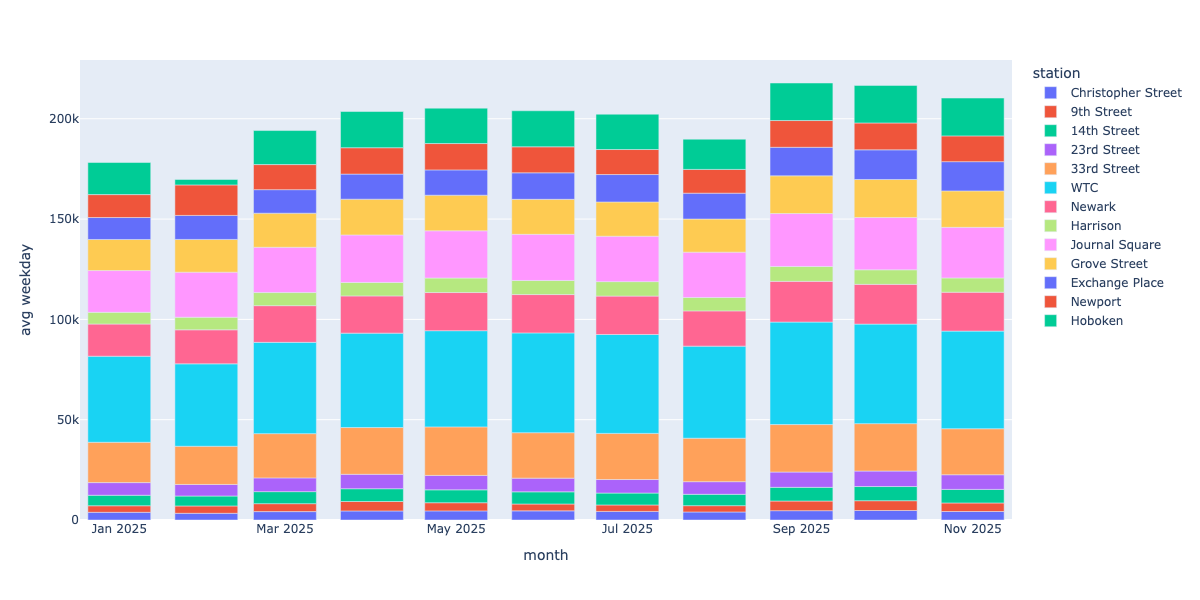

In [25]:
fig = px.bar(
    avgs[~avgs.station.str.contains('TOTAL')],
    x='month', y='avg weekday', color='station',
)
Image(fig.to_image(width=1200, height=600))